# Non Linear Regression Analysis

Linear regression assumes that data is related linearly. When data shows a curved shape trend linear regression does not 
produce accurate results.For such data non linear regression performs better. 

In this note book Chaina's GDP data from 1960 to 2014 having non-linear relation is used.

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Linear regression is a good technique to solve range of problems however, it cannot be applied on all the datasets.It models a linear relationship between a dependent variable __y__ and independent varible __x__.It has a simple equation of degree 1.

$y=m*x+c$

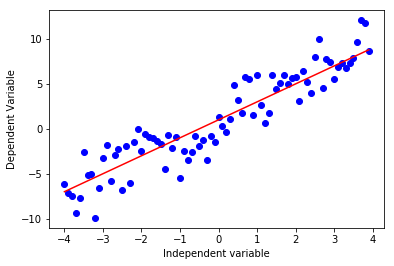

In [2]:
# example 3*x+6
x=np.arange(-4.0,4.0,0.1)
y=2*x+1

y_noise=2*np.random.normal(size=x.size)

y_data=y+y_noise

plt.plot(x,y_data,'bo')

plt.plot (x,y,'r')

plt.ylabel('Dependent Variable')

plt.xlabel('Independent variable')

plt.show()


Non linear regressions are a relationship between independent variable __x__ and dependent variable __y__ which result in a non-linear modeled data. Non linear relationship are presented using a using a polynomial of degree __k__ . __k__ presents power of __x__ .

$$y=ax^3+bx^2+cx+d$$

Non linear can have non linear elements such as exponentials, logarithms, fractions and others.Such as $$y=log(x)$$ or more complex form like $$y=log(ax^3+bx^2+cx+d)$$

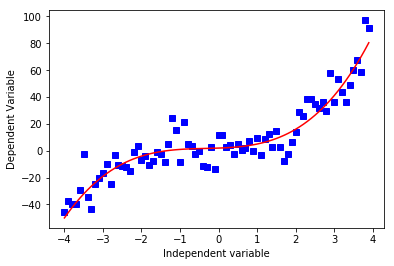

In [3]:
# Cubic graph

x=np.arange(-4.0,4.0,0.1)

y=x**3+x**2+x+2

y_noise=10*np.random.normal(size=x.size)

y_data=y+y_noise

plt.plot(x,y_data,'bs')

plt.plot (x,y,'r')

plt.ylabel('Dependent Variable')

plt.xlabel('Independent variable')

plt.show()


# Exponential form

An exponential function with base c is defined by $$ Y = a + b c^X$$ where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable. 



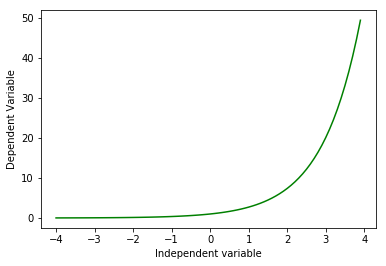

In [4]:
x=np.arange(-4.0,4.0,0.1)

y=np.exp(x)





plt.plot (x,y,'g')

plt.ylabel('Dependent Variable')

plt.xlabel('Independent variable')

plt.show()


# Lograthimic 

The response $y$ is a results of applying logarithmic map from input $x$'s to output variable $y$. It is one of the simplest form of __log()__: i.e. $$ y = \log(x)$$

Please consider that instead of $x$, we can use $X$, which can be polynomial representation of the $x$'s. In general form it would be written as  
\begin{equation}
y = \log(X)
\end{equation}

C:\Users\S BL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


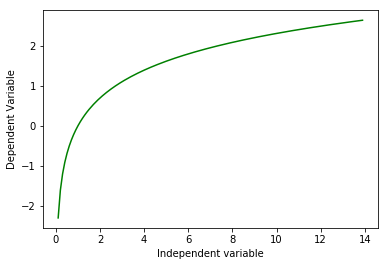

In [5]:
x=np.arange(-14.0,14.0,0.1)

y=np.log(x)





plt.plot (x,y,'g')

plt.ylabel('Dependent Variable')

plt.xlabel('Independent variable')

plt.show()

### Sigmoidal/Logistic

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

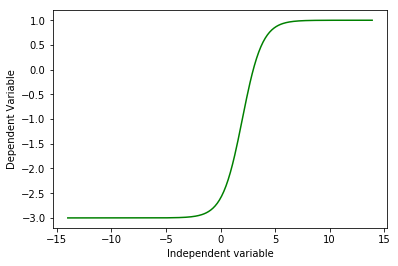

In [6]:


x=np.arange(-14.0,14.0,0.1)

y = 1-4/(1+np.power(3, x-2))





plt.plot (x,y,'g')

plt.ylabel('Dependent Variable')

plt.xlabel('Independent variable')

plt.show()

# Non Linear Regression 


China's GDP data set is used here for building non linear model.

It consist of two columns.One represents year from 1960 to 2014 and second represnts China's annual gross domestic income is US dollars for a particular year.

In [7]:
import numpy as np
import pandas as pd


df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


# Data Visualization

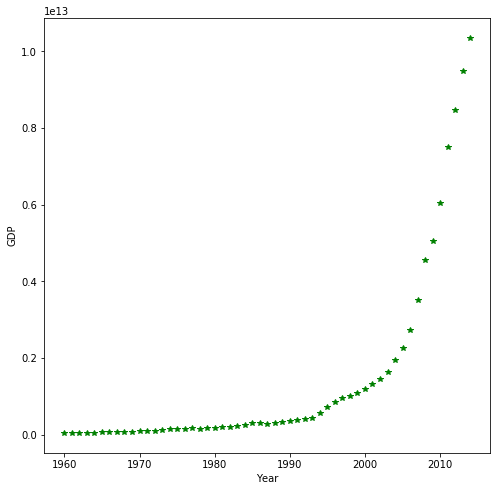

In [8]:
plt.figure(figsize=(8,8))
x_data,y_data=df['Year'],df['Value']
plt.plot(x_data,y_data,'g*')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()


This dataset follows lograthimic or exponential trend.Intially growth is quite slow , from 2005 onward there is significant rise in growth rate and finally it decelerates 2010s.

# Choosing Model 

Through visual inspection of the graph it seems that logitistic function will be a good approximation.Because it has slow growth
rate at start , increasing in the middle and decreasing at the end. 

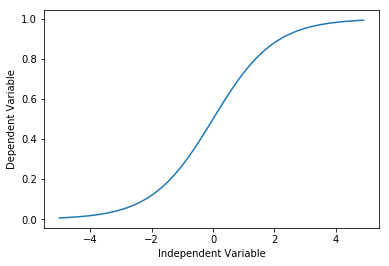

In [9]:
x=np.arange(-5.0,5.0,0.1)

y= 1.0/(1.0 + np.exp(-x))

plt.plot(x,y)

plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

# Build the model

Here regression model is build using sigmoid function and it's parameters are initialized.

In [10]:
def sigmoid(x,beta1,beta2,):
    
    y=1/(1+np.exp(-beta1*(x-beta2)))
    
    return y

Sample sigmoid line that might fit with data.

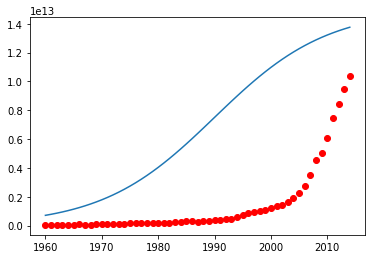

In [11]:
beta1=0.10
beta2=1990.0

Y_pred=sigmoid(x_data,beta1,beta2)


#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000)
plt.plot(x_data, y_data, 'ro')

 Our task is to find best parameters for the model.First we have to normalize our data set.

In [12]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

### Finding best parameter for fit line

To find best parameters we can use curve_fit which uses non linear least squares to fit our sigmoid function, to data.Optimal values for the parameters such that sum of the squared residuals of sigmoid(x_data,*popt)-y_data is minimized.

popt describes optimization parameters.

In [21]:
from scipy.optimize import curve_fit

popt,pcov=curve_fit(sigmoid, xdata, ydata)

#print the final parameters
print(" beta1 = %f, beta2 = %f" % (popt[0], popt[1]))


 beta1 = 690.451711, beta2 = 0.997207


# Plotting final regression model

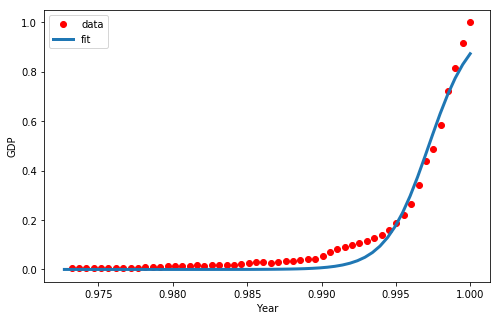

In [14]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

# Accuracy of model


Ealier we used complete data set for fitting the model. 

To find accuracy of model we should use different datasets for training and testing. Testing dataoint should not be seen by model during training phase.

### Splitting Data

80 percent data is used for training and 20 percent for testing.

In [16]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

### Training Model

In [17]:
popt, pcov = curve_fit(sigmoid, train_x, train_y)  # popt describes optimization parameters

### Testing Model

In [19]:
# predict using test set
y_hat = sigmoid(test_x, *popt)


# Evaluation of Model

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.92


# End